In [1]:
# TTE Model Monitoring: Performance Metrics Evaluation

# In this example, we use synthetic Time-to-Event data to evaluate a survival model
# using performance metrics like the Concordance Index and Integrated Brier Score.

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sksurv.datasets import load_whas500
from sksurv.linear_model import CoxPHSurvivalAnalysis
from sksurv.metrics import concordance_index_censored, integrated_brier_score
from sksurv.preprocessing import OneHotEncoder
from sksurv.util import Surv
from sksurv.ensemble import GradientBoostingSurvivalAnalysis
from sksurv.metrics import brier_score
import matplotlib.pyplot as plt

In [2]:
# 1. Load dataset (e.g. WHAS500 from scikit-survival)
data_x, data_y = load_whas500()

data_x_enc = OneHotEncoder().fit_transform(data_x)

In [3]:
# 2. Split into training and test sets
x_train, x_test, y_train, y_test = train_test_split(
    data_x_enc, data_y, test_size=0.3, random_state=42
)

In [4]:
# 3. Train Cox Proportional Hazards Model
model = CoxPHSurvivalAnalysis()
model.fit(x_train, y_train)

CoxPHSurvivalAnalysis()

In [6]:
y_test

array([(False, 5.290e+02), (False, 1.969e+03), (False, 3.980e+02),
       (False, 2.083e+03), ( True, 3.630e+02), ( True, 6.730e+02),
       (False, 3.860e+02), ( True, 1.870e+02), (False, 1.942e+03),
       ( True, 3.590e+02), (False, 2.175e+03), (False, 1.408e+03),
       (False, 4.660e+02), (False, 2.145e+03), (False, 5.160e+02),
       ( True, 6.460e+02), ( True, 1.000e+01), ( True, 8.490e+02),
       (False, 1.114e+03), ( True, 1.450e+02), ( True, 3.970e+02),
       ( True, 1.400e+01), (False, 1.207e+03), (False, 5.890e+02),
       (False, 1.940e+03), (False, 4.160e+02), (False, 7.250e+02),
       (False, 1.409e+03), ( True, 1.010e+02), (False, 1.320e+03),
       (False, 4.000e+02), (False, 1.178e+03), (False, 4.030e+02),
       ( True, 1.627e+03), (False, 2.190e+03), (False, 1.105e+03),
       ( True, 3.300e+01), ( True, 1.510e+02), ( True, 1.080e+02),
       (False, 1.964e+03), ( True, 6.000e+01), ( True, 1.954e+03),
       ( True, 6.440e+02), (False, 1.438e+03), ( True, 2.000e+

In [7]:
# 4. Evaluate Concordance Index on test set
# cindex, concordant, discordant, tied_risk, tied_time = concordance_index_censored(
#     y_test["dead"], y_test["lenfol"], model.predict(x_test)
# )
cindex, concordant, discordant, tied_risk, tied_time = concordance_index_censored(
    y_test["fstat"], y_test["lenfol"], model.predict(x_test)
)
print(f"Concordance Index (C-index): {cindex:.4f}")

Concordance Index (C-index): 0.7392


In [8]:
# 5. Calculate Integrated Brier Score
# Create time grid
pred_times = np.percentile(y_train["lenfol"], np.linspace(5, 95, 100))

# Compute survival functions
surv_fns = model.predict_survival_function(x_test, return_array=False)

# Calculate Brier scores
score = integrated_brier_score(
    y_train, y_test, surv_fns, pred_times
)
print(f"Integrated Brier Score (IBS): {score:.4f}")

TypeError: float() argument must be a string or a real number, not 'StepFunction'

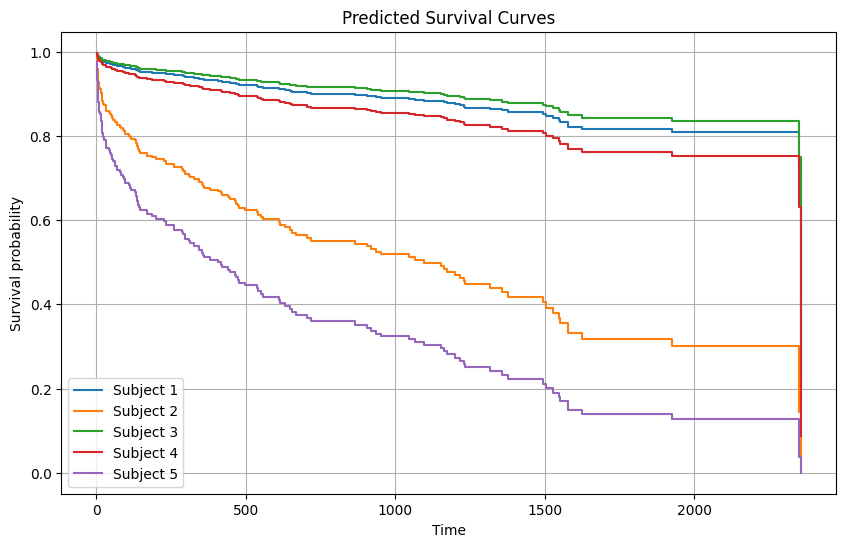

In [9]:
# 6. Plot predicted survival curves for first 5 individuals
plt.figure(figsize=(10, 6))
for i, fn in enumerate(surv_fns[:5]):
    plt.step(fn.x, fn.y, where="post", label=f"Subject {i+1}")

plt.xlabel("Time")
plt.ylabel("Survival probability")
plt.title("Predicted Survival Curves")
plt.legend()
plt.grid(True)
plt.show()